In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import Module as mod

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

A continuación veremos varios ejemplos donde utilizar la metodología (los paquetes) anteriormente programados

In [8]:
# Ejemplo 1
def guitarra(xlim, utilez, NoHomog=[0, 0], ZipName='SimulacionData', info=False,
           user_action=None):
    """
    Triangular wave (pulled guitar string).
    """
    
    xmin, xmax = xlim
    Nx, C, a0, wavelength, freq, num_periods = utilez
    
    
    # parametros
    c = freq*wavelength
    omega = 2*np.pi*freq
    tmax = 2*np.pi/omega*num_periods
    x0 = 0.8*xmax
    
    dt = C*(xmax/Nx)/c
    dx = dt/float(C)
    
    def pulsoCuadr(x, a0, x0):
        Ixi = a0*x/x0
        ind = x > x0
        Ixi[ind] = a0/(xmax-x0)*(xmax-x[ind])
        return Ixi
    
    def u0x(x):
        uxi0 = pulsoCuadr(x, a0, x0)
        return uxi0
    
    ut = lambda x: 0        
    dVx = lambda u: 0
    
    u, xi, ti, cpu_time = mod.solver(dt=dt, dx=dx, xmin=xmin, xmax=xmax, tmin=0, tmax=tmax,
                                     ux=u0x, dux=ut, dVx=dVx, NoHomog=NoHomog, ZipName=ZipName,
                                     info=info, user_action=user_action) 
    return u, xi, ti, cpu_time

In [16]:
# Implementación
x0, xmax = 0, 15
xlim = [x0, xmax]

Nx, m, C = 20, 0, 0.5
a0, wavelength, freq, num_periods = 0.01, 2*xmax, .4, 4
utilez = [Nx, C, a0, wavelength, freq, num_periods]

nameZip = 'SimulacionData1'
NoHomog = [0, 0]

u, xi, ti, cpu_time = guitarra(xlim, utilez, NoHomog=[0, 0], ZipName=nameZip, info=False,
           user_action=None)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_48490/1142754304.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


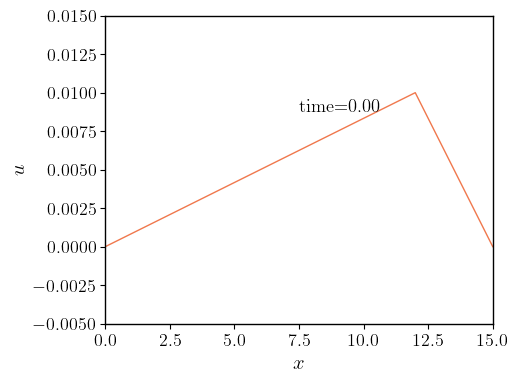

In [17]:
# Creando video
address = 'Data/SimulacionData1.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))

dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'Guitarra'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-a0/2, a0+a0/2])  # -a0-a0/2

In [4]:
# Ejemplo 2
def ProfGaussiana(xlim, tlim, utilez, NoHomog=[0, 0], ZipName='SimulacionData', info=False,
           user_action=None):
    """Gauss wave (pulled guitar string)."""
    
    xmin, xmax = xlim
    tmin, tmax = tlim
    Nx, C, m, a0, mu, sig = utilez
    
    dt = C*(xmax/Nx)
    dx = dt/float(C) 

    def gaussian(x, mu, sig, a0):
        return a0/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

    def u0x(x):
        uxi0 = gaussian(x, mu, sig, a0)
        return uxi0
    
    ut = lambda x: 0        
    dVx = lambda u: m*u
    
    u, xi, ti, cpu_time = mod.solver(dt=dt, dx=dx, xmin=xmin, xmax=xmax, tmin=tmin, tmax=tmax,
                                     ux=u0x, dux=ut, dVx=dVx, NoHomog=NoHomog, ZipName=ZipName,
                                     info=info, user_action=user_action)
 
    return u, xi, ti, cpu_time

In [7]:
# Implementación
x0, xmax = -5, 5
xlim = [x0, xmax]

tmin, tmax = 0, 10
tlim = [tmin, tmax]

a0, mu, sig = 0.01, 0, 0.5
Nx, m, C = 500, 1, 1
utilez = [Nx, C, m, a0, mu, sig]
nameZip = 'SimulacionData2'
NoHomog = [0, 0]

u, xi, ti, cpu_time = ProfGaussiana(xlim, tlim, utilez, NoHomog=NoHomog, ZipName=nameZip, info=False,
           user_action=None)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_51226/1894781048.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


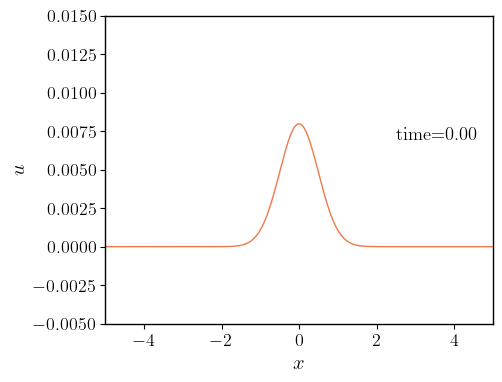

In [8]:
# Creando video
address = 'Data/SimulacionData2.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))

dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'Gaussiana'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-a0/2, a0+a0/2])  # -a0-a0/2

In [13]:
# Ejemplo 3

def SombreroMexicano(xlim, tlim, utilez, NoHomog=[0, 0], ZipName='SimulacionData', info=False,
           user_action=None):
    """
    1 + 1 Klein-Gordon sistema 
    
    d^2u/dt^2 = d^2u/dx^2 - V'(u)
    
    con un potencial tipo sombrero mexicano: V = lam*(u^2-v^2)/4, con v^2=m^2/lam.
    
    Condiciones iniciales:
    u(t=0, x) = lam*v*np.tanh(m*x/(np.sqrt(2*(1-v0**2))))
    du/dt(t=0, x) = (-lam*m*v*v0/np.sqrt(2*(1-v0**2)))/np.cosh(m*x/(np.sqrt(2*(1-v0**2))))**2
    
    Condiciones a la frontera:
    u(t, xmin) = -v
    u(t, xmax) = v
    
    
    In:
    xlim -> [xmin, xmax] limites espaciales
    tlim -> [tmin, tmax] limites temporales
    utilez -> [Nx, v, v0, lam, m , C]
            Nx -> numero de puntos de la malla espacial
                  la discretización temporal se construye a partir de dx y C usando dt = C*(xmax/Nx)
            v, v0, m -> parámetros del modelo. Nota: -1 < v0 < 1
            lam -> +1 o -1
    
    NoHomog -> [u(t, xmin), u(t, xmax)] condiciones a la frontera
    ZipName -> nombre del archivo con los datos de la simulación
    info -> True o False Imprime algunos datos
    
    Out:
    u, xi, ti, cpu_time
    """

    xmin, xmax = xlim
    tmin, tmax = tlim
    Nx, v, v0, lam, m, C = utilez
    
    dt = C*(xmax/Nx)
    dx = dt/float(C)

    def kinProf(x, lam, v, v0, m):
        return lam*v*np.tanh(m*x/(np.sqrt(2*(1-v0**2))))
    
    def dkinProf(x, lam, v, v0, m):
        return (-lam*m*v*v0/np.sqrt(2*(1-v0**2)))/np.cosh(m*x/(np.sqrt(2*(1-v0**2))))**2

    def u0x(x):
        uxi0 = kinProf(x, lam, v, v0, m)
        return uxi0
    
    def ut(x):
        duxi0 = dkinProf(x, lam, v, v0, m)
        return duxi0
        
    dVx = lambda u: lam*(u**2-v**2)*u
    
    u, xi, ti, cpu_time = mod.solver(dt=dt, dx=dx, xmin=xmin, xmax=xmax, tmin=tmin, tmax=tmax,
                                     ux=u0x, dux=ut, dVx=dVx, NoHomog=NoHomog, ZipName=ZipName,
                                     info=info, user_action=user_action)
    
    return u, xi, ti, cpu_time

In [18]:
# Implementación
x0, xmax = -10, 10
xlim = [x0, xmax]

tmin, tmax = 0, 10
tlim = [tmin, tmax]

v = 1
m = 1
lam = 1
v0 = 0.9
Nx = 500
C = 1

utilez = [Nx, v, v0, lam, m, C]
nameZip = 'SimulacionData3'
NoHomog = [-v, v]

u, xi, ti, cpu_time = SombreroMexicano(xlim, tlim, utilez, NoHomog=NoHomog, ZipName=nameZip, info=False,
           user_action=None)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_48490/4049852698.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


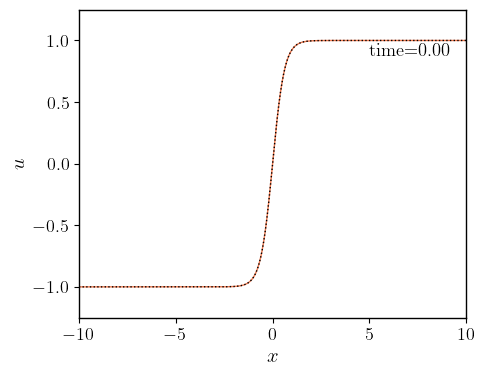

In [19]:
# Creando video
address = 'Data/SimulacionData3.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))

fu = lambda t, x: lam*v*np.tanh(m*(x-v0*t)/np.sqrt(1-v0**2)/np.sqrt(2))  # solución analítica
dvideo = mod.Visualization(address, figData, solAnalit=fu)

n0 = 0
dataname = '.data'
nameV = 'soliton'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-1.25, 1.25])